# Analysis

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn import linear_model, metrics

import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('sanitary_inspection_predict.csv')

In [3]:
data

,PHONE,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,Score_Now,Average_Score,Inspection,Times_Graded,...,Miscellaneous,Nutrition,Other,Personal_Hygiene,Signage,Tabacco,Vermin_Garbage,Critical,Unnamed: 24,Unnamed: 25
0,(718)7377181,PIG BEACH,BROOKLYN,UNION STREET,11211,Other,56,56.000000,1,1,...,0,0,0,0,0,0,0,2,NaN,NaN
1,1646644665,STATUS Q,BROOKLYN,3RD AVE,11209,Hotdogs,11,18.333333,2,2,...,0,0,0,3,0,0,0,5,NaN,NaN
2,1646670060,HONEY BADGER IN LEFFERTS GARDENS,BROOKLYN,FENIMORE ST,11225,American,5,5.000000,1,1,...,0,0,0,1,0,0,0,1,NaN,NaN
3,1729986806,TOUS LES JOURS,QUEENS,PRINCE ST,11354,Bakery,12,9.666667,2,2,...,0,0,0,2,0,0,0,3,NaN,NaN
4,2012054054,ATO,MANHATTAN,GRAND ST,10013,Other,32,32.000000,1,1,...,0,0,0,1,0,0,0,4,NaN,NaN
5,2012207599,MORRIS HEIGHTS PIZZA,BRONX,UNIVERSITY AVE,10453,American,28,18.600000,4,2,...,0,0,0,0,0,0,3,6,NaN,NaN
6,2012335992,CHARLEY'S GRILLED SUBS,QUEENS,QUEENS BLVD,11373,Sandwiches/Salads/Mixed Buffet,9,11.400000,2,2,...,0,0,0,0,0,0,1,2,NaN,NaN
7,2012565165,HOUSE OF THAI,QUEENS,40TH AVE,11101,Thai,8,16.444444,4,3,...,0,0,0,3,0,0,0,6,NaN,NaN
8,2013042844,ALPHAVILLE,BROOKLYN,WILSON AVE,11237,American,26,29.774194,7,4,...,0,0,0,10,0,0,3,18,NaN,
9,2014031014,CHARLEYS PHILLY STEAK,BRONX,BAYCHESTER AVE,10475,American,17,15.400000,2,2,...,0,0,0,3,0,0,0,5,NaN,NaN


In [5]:
data.columns

Index([u'PHONE', u'DBA', u'BORO', u'STREET', u'ZIPCODE',
       u'CUISINE DESCRIPTION', u'Score_Now', u'Average_Score', u'Inspection',
       u'Times_Graded', u'Administration', u'Facility_Design',
       u'Facility_Maintenance', u'Food_Protection', u'Food_Source',
       u'Food_Temperature', u'Miscellaneous', u'Nutrition', u'Other',
       u'Personal_Hygiene', u'Signage', u'Tabacco', u'Vermin_Garbage',
       u'Critical', u'Unnamed: 24', u'Unnamed: 25'],
      dtype='object')

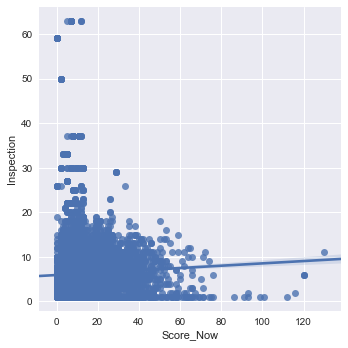

In [8]:
sns.lmplot('Score_Now','Inspection', data)

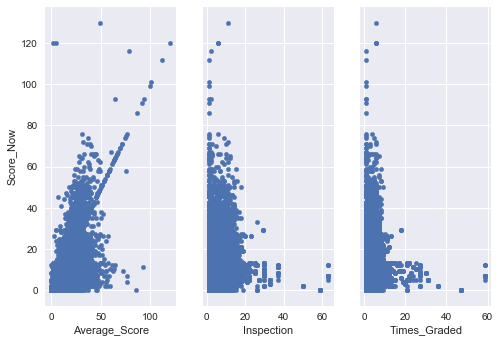

In [14]:

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Average_Score', y='Score_Now', ax=axs[0])
data.plot(kind='scatter', x='Inspection', y='Score_Now', ax=axs[1])
data.plot(kind='scatter', x='Times_Graded', y='Score_Now', ax=axs[2])


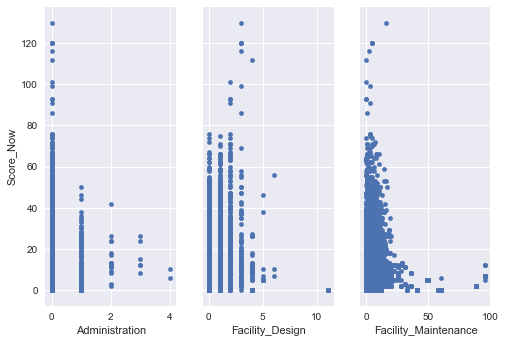

In [15]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Administration', y='Score_Now', ax=axs[0])
data.plot(kind='scatter', x='Facility_Design', y='Score_Now', ax=axs[1])
data.plot(kind='scatter', x='Facility_Maintenance', y='Score_Now', ax=axs[2])


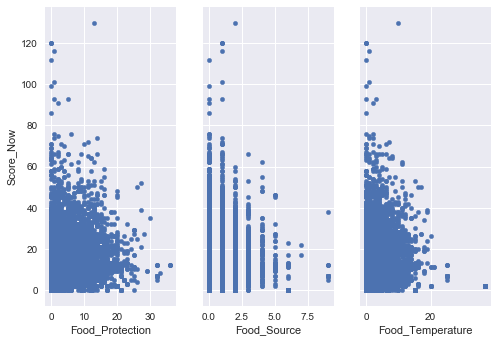

In [16]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Food_Protection', y='Score_Now', ax=axs[0])
data.plot(kind='scatter', x='Food_Source', y='Score_Now', ax=axs[1])
data.plot(kind='scatter', x='Food_Temperature', y='Score_Now', ax=axs[2])


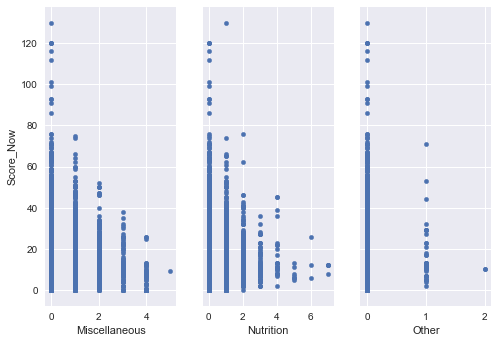

In [17]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Miscellaneous', y='Score_Now', ax=axs[0])
data.plot(kind='scatter', x='Nutrition', y='Score_Now', ax=axs[1])
data.plot(kind='scatter', x='Other', y='Score_Now', ax=axs[2])


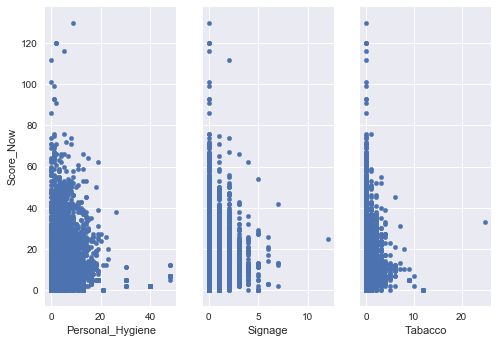

In [18]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Personal_Hygiene', y='Score_Now', ax=axs[0])
data.plot(kind='scatter', x='Signage', y='Score_Now', ax=axs[1])
data.plot(kind='scatter', x='Tabacco', y='Score_Now', ax=axs[2])


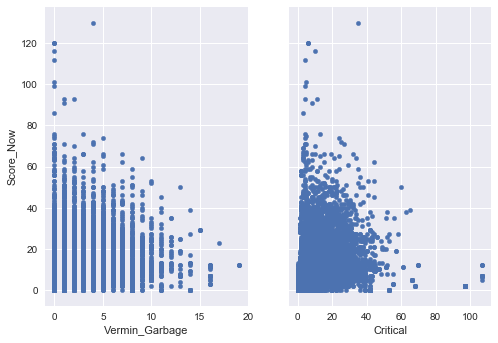

In [20]:
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='Vermin_Garbage', y='Score_Now', ax=axs[0])
data.plot(kind='scatter', x='Critical', y='Score_Now', ax=axs[1])


In [203]:
features = ['Critical',
                      'Vermin_Garbage',
                      'Tabacco', 
                      'Signage',
                      'Personal_Hygiene',
                      'Nutrition',
                     'Miscellaneous', 
                      'Average_Score', 
                      'Inspection',
                      'Times_Graded', 
                      'Administration', 
                      'Facility_Design',
                      'Facility_Maintenance', 
                      'Food_Protection', 
                      'Food_Source',
                      'Food_Temperature']
modeldata = data[]
y = data['Score_Now']

In [75]:
features = ['Average_Score',
                      'Facility_Design']
modeldata = data[features]
y = data['Score_Now']

In [76]:
modeldata

,Average_Score,Facility_Design
0,56.000000,1
1,18.333333,0
2,5.000000,0
3,9.666667,0
4,32.000000,1
5,18.600000,0
6,11.400000,0
7,16.444444,0
8,29.774194,1
9,15.400000,0


In [101]:
from sklearn import grid_search
from sklearn import cross_validation
lm = linear_model.Ridge()

In [247]:
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,
          'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
          'fit_intercept': [True, False],
           'penalty': ['l2', 'l1', 'elasticnet']
          } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(modeldata, y)
    

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=25298, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01]), 'fit_intercept': [True, False], 'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [248]:
gs.best_estimator_

SGDRegressor(alpha=1.0000000000000001e-05, average=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='epsilon_insensitive', n_iter=5,
       penalty='elasticnet', power_t=0.25, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [250]:
gs.best_score_

0.22160647251426427

In [251]:
gs.best_estimator_.coef_

array([-0.12542781,  0.05619056,  0.15948936,  0.12533139,  0.16224162,
        0.15123593,  0.00660682,  0.37076468, -0.19141309,  0.14055694,
       -0.03943443, -0.46473442, -0.1513539 ,  0.0996695 ,  0.11283111,
        0.10421892])

In [252]:
zip(features,gs.best_estimator_.coef_)

[('Critical', -0.12542780552150692),
 ('Vermin_Garbage', 0.056190559950131308),
 ('Tabacco', 0.15948936203143177),
 ('Signage', 0.1253313858835835),
 ('Personal_Hygiene', 0.16224162474635687),
 ('Nutrition', 0.15123592599597926),
 ('Miscellaneous', 0.0066068214940291047),
 ('Average_Score', 0.37076468181440086),
 ('Inspection', -0.19141308796285084),
 ('Times_Graded', 0.14055693965406413),
 ('Administration', -0.039434425147281293),
 ('Facility_Design', -0.46473442062992609),
 ('Facility_Maintenance', -0.15135389870478982),
 ('Food_Protection', 0.099669499668245537),
 ('Food_Source', 0.11283111131811495),
 ('Food_Temperature', 0.10421892072622961)]

In [107]:
grid = pd.DataFrame(gs.grid_scores_)
grid.parameters = grid.parameters.apply(lambda x: x['alpha'])
grid.mean_validation_score = grid.mean_validation_score.apply(lambda x: -x)
grid.columns = ['alpha', 'neg_mean_squared_error', 'cv']

In [108]:
grid

,alpha,neg_mean_squared_error,cv
0,1.000000e-10,1.089182e+18,"[-4.8475034746e+18, -7.57905954226e+15, -6.896..."
1,1.000000e-10,3.119775e+18,"[-1.51027926903e+18, -5.70321704065e+15, -1.77..."
2,1.000000e-10,3.518806e+17,"[-2.19671796177e+16, -8.06315221005e+15, -3.70..."
3,1.000000e-10,-1.955210e-01,"[0.214292613826, 0.207730976671, 0.20658307905..."
4,1.000000e-10,-1.908148e-01,"[0.198749486608, 0.196340470753, 0.20387309021..."
5,1.000000e-10,-1.962436e-01,"[0.207884184456, 0.208963094613, 0.20349239501..."
6,1.000000e-10,-1.958051e-01,"[0.222085152296, 0.186543462444, 0.22683548020..."
7,1.000000e-10,-1.795346e-01,"[0.00400323334392, 0.236010084701, 0.238766780..."
8,1.000000e-10,-1.923976e-01,"[0.217500117829, 0.234597626749, 0.16076630558..."
9,1.000000e-10,5.398606e+19,"[-2.81532622068e+19, -2.03660346228e+17, -2.39..."


In [305]:
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,
          'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'],
          'fit_intercept': [True, False],
           'normalize': [True, False]
          } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(scaled_feature, y)
    

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


KeyboardInterrupt: 

In [186]:
grid = pd.DataFrame(gs.grid_scores_)
grid.parameters = grid.parameters.apply(lambda x: x['alpha'])
grid.mean_validation_score = grid.mean_validation_score.apply(lambda x: -x)
grid.columns = ['alpha', 'neg_mean_squared_error', 'cv']

In [80]:
grid

,alpha,neg_mean_squared_error,cv
0,1.000000e-10,-0.170313,"[0.203408478804, 0.145651043551, 0.16308292487..."
1,1.000000e-10,-0.088438,"[-0.0464305042382, 0.0779528875928, -0.0872834..."
2,1.000000e-10,-0.100783,"[0.199467366209, 0.205963117233, 0.18376752971..."
3,1.000000e-10,-0.202537,"[0.158222241029, 0.175054306467, 0.14010662043..."
4,1.000000e-10,-0.206168,"[0.162850131507, 0.19076697969, 0.146594597041..."
5,1.000000e-10,-0.202341,"[0.162909442325, 0.181090943111, 0.14366708825..."
6,1.000000e-10,-0.191711,"[0.197889469579, 0.151117943144, 0.15859596402..."
7,1.000000e-10,-0.184887,"[0.186947056441, 0.210653293888, 0.15262270603..."
8,1.000000e-10,-0.210178,"[0.195931709879, 0.194708406811, 0.18746424846..."
9,1.000000e-10,-0.097782,"[0.0956410179568, 0.107801320117, -0.155196195..."


In [232]:
gs.best_estimator_

Ridge(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='lsqr',
   tol=0.001)

In [233]:
gs.best_score_

0.2464574929934992

In [234]:
gs.best_estimator_.coef_

array([ 0.06921048,  0.10240869,  0.0375169 ,  0.09259538,  0.01978741,
        0.09887271,  0.00232579,  0.42277806, -0.07514495, -0.21213613,
        0.01505996, -0.02462588, -0.10234272,  0.01208414,  0.1795758 ,
        0.00920024])

In [288]:
zip(features,gs.best_estimator_.coef_)

[('Critical', 0.076692212999117576),
 ('Vermin_Garbage', 0.02610361328713743),
 ('Tabacco', 0.0),
 ('Signage', 0.0),
 ('Personal_Hygiene', 0.0),
 ('Nutrition', 0.0),
 ('Miscellaneous', 0.0),
 ('Average_Score', 0.42680116132013085),
 ('Inspection', -0.023308452983066909),
 ('Times_Graded', -0.22074063683002046),
 ('Administration', 0.0),
 ('Facility_Design', -0.0),
 ('Facility_Maintenance', -0.094636696718733843),
 ('Food_Protection', 0.015289825105622079),
 ('Food_Source', 0.0),
 ('Food_Temperature', -0.0)]

In [124]:
lm = linear_model.Lasso()

In [239]:
ridge = pd.DataFrame(zip(features,gs.best_estimator_.coef_))
ridge.columns = ['Features','Ridge']
ridge

,Features,Ridge
0,Critical,0.069210
1,Vermin_Garbage,0.102409
2,Tabacco,0.037517
3,Signage,0.092595
4,Personal_Hygiene,0.019787
5,Nutrition,0.098873
6,Miscellaneous,0.002326
7,Average_Score,0.422778
8,Inspection,-0.075145
9,Times_Graded,-0.212136


In [253]:
sdg = pd.DataFrame(zip(features,gs.best_estimator_.coef_))
sdg.columns = ['Features','SDG']
sdg

,Features,SDG
0,Critical,-0.125428
1,Vermin_Garbage,0.056191
2,Tabacco,0.159489
3,Signage,0.125331
4,Personal_Hygiene,0.162242
5,Nutrition,0.151236
6,Miscellaneous,0.006607
7,Average_Score,0.370765
8,Inspection,-0.191413
9,Times_Graded,0.140557


In [240]:
results

,Features,Lasso,Ridge
0,Critical,0.087477,0.029279
1,Vermin_Garbage,0.069928,0.072845
2,Tabacco,0.013353,0.025500
3,Signage,0.114710,0.150778
4,Personal_Hygiene,0.000000,0.064753
5,Nutrition,0.147359,0.180242
6,Miscellaneous,-0.000000,-0.009358
7,Average_Score,0.423291,0.417176
8,Inspection,-0.076093,-0.071662
9,Times_Graded,-0.202082,-0.210412


In [272]:
results = results.merge(sdg)
results

,Features,Lasso,Ridge,SDG
0,Critical,0.087477,0.069210,-0.125428
1,Vermin_Garbage,0.069928,0.102409,0.056191
2,Tabacco,0.013353,0.037517,0.159489
3,Signage,0.114710,0.092595,0.125331
4,Personal_Hygiene,0.000000,0.019787,0.162242
5,Nutrition,0.147359,0.098873,0.151236
6,Miscellaneous,-0.000000,0.002326,0.006607
7,Average_Score,0.423291,0.422778,0.370765
8,Inspection,-0.076093,-0.075145,-0.191413
9,Times_Graded,-0.202082,-0.212136,0.140557


In [273]:
results.sort(columns='Lasso',ascending = False)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Features,Lasso,Ridge,SDG
7,Average_Score,0.423291,0.422778,0.370765
14,Food_Source,0.157078,0.179576,0.112831
5,Nutrition,0.147359,0.098873,0.151236
3,Signage,0.114710,0.092595,0.125331
0,Critical,0.087477,0.069210,-0.125428
1,Vermin_Garbage,0.069928,0.102409,0.056191
2,Tabacco,0.013353,0.037517,0.159489
13,Food_Protection,0.007579,0.012084,0.099669
4,Personal_Hygiene,0.000000,0.019787,0.162242
6,Miscellaneous,-0.000000,0.002326,0.006607


In [314]:
results.to_csv('linearregression_coef.csv', encoding = 'utf-8')

In [279]:
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
feature_set = data[features]
sc = StandardScaler()
scaled_feature = sc.fit_transform(feature_set)


In [307]:
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,
          'fit_intercept': [True, False],
           'normalize': [True, False]
          } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(scaled_feature, y)
    

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=25298, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [308]:
gs.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [309]:
gs.best_score_

0.2476091958924653

In [310]:
gs.best_estimator_.coef_

array([ 0.65569082,  0.14978477,  0.00966761,  0.07419454,  0.02494654,
        0.08035418, -0.        ,  3.29442977, -0.21381063, -0.71559565,
        0.03172052, -0.03480675, -0.61782313,  0.0658864 ,  0.13579771,  0.        ])

In [311]:
gs.best_estimator_.predict(scaled_feature)


array([ 28.91765935,  12.70759236,   7.09188724, ...,   6.92176528,
         9.2774332 ,  11.66753436])

In [296]:
data = data.drop('predict',axis=1)

In [297]:
data['predict'] = gs.best_estimator_.predict(scaled_feature)
data

,PHONE,DBA,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,Score_Now,Average_Score,Inspection,Times_Graded,...,Nutrition,Other,Personal_Hygiene,Signage,Tabacco,Vermin_Garbage,Critical,Unnamed: 24,Unnamed: 25,predict
0,(718)7377181,PIG BEACH,BROOKLYN,UNION STREET,11211,Other,56,56.000000,1,1,...,0,0,0,0,0,0,2,NaN,NaN,28.917659
1,1646644665,STATUS Q,BROOKLYN,3RD AVE,11209,Hotdogs,11,18.333333,2,2,...,0,0,3,0,0,0,5,NaN,NaN,12.707592
2,1646670060,HONEY BADGER IN LEFFERTS GARDENS,BROOKLYN,FENIMORE ST,11225,American,5,5.000000,1,1,...,0,0,1,0,0,0,1,NaN,NaN,7.091887
3,1729986806,TOUS LES JOURS,QUEENS,PRINCE ST,11354,Bakery,12,9.666667,2,2,...,0,0,2,0,0,0,3,NaN,NaN,8.960928
4,2012054054,ATO,MANHATTAN,GRAND ST,10013,Other,32,32.000000,1,1,...,0,0,1,0,0,0,4,NaN,NaN,18.744007
5,2012207599,MORRIS HEIGHTS PIZZA,BRONX,UNIVERSITY AVE,10453,American,28,18.600000,4,2,...,0,0,0,0,0,3,6,NaN,NaN,13.013784
6,2012335992,CHARLEY'S GRILLED SUBS,QUEENS,QUEENS BLVD,11373,Sandwiches/Salads/Mixed Buffet,9,11.400000,2,2,...,0,0,0,0,0,1,2,NaN,NaN,9.505652
7,2012565165,HOUSE OF THAI,QUEENS,40TH AVE,11101,Thai,8,16.444444,4,3,...,0,0,3,0,0,0,6,NaN,NaN,11.463649
8,2013042844,ALPHAVILLE,BROOKLYN,WILSON AVE,11237,American,26,29.774194,7,4,...,0,0,10,0,0,3,18,NaN,,17.419109
9,2014031014,CHARLEYS PHILLY STEAK,BRONX,BAYCHESTER AVE,10475,American,17,15.400000,2,2,...,0,0,3,0,0,0,5,NaN,NaN,11.556363


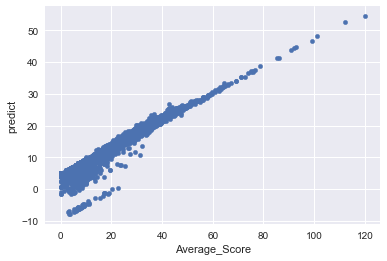

In [298]:
data.plot(x='Average_Score',y='predict',kind='scatter')

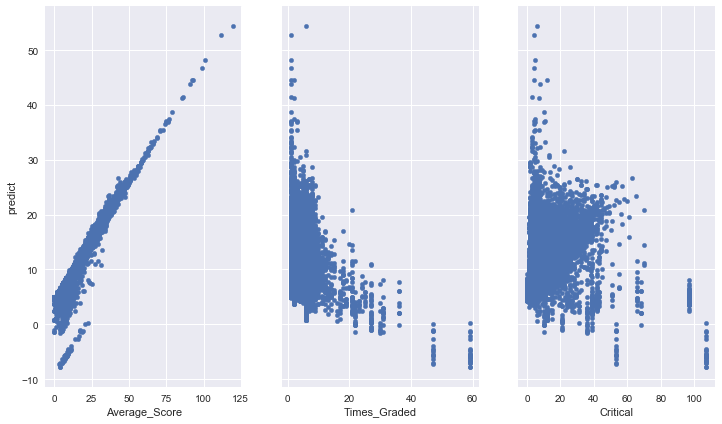

In [317]:
fig, axs = plt.subplots(1, 3, sharey=True)
.plot(kind='scatter', x='Average_Score', y='predict', ax=axs[0],figsize=(12,7))
data.plot(kind='scatter', x='Times_Graded', y='predict', ax=axs[1])
data.plot(kind='scatter', x='Critical', y='predict', ax=axs[2])


In [300]:
zip(features,gs.best_estimator_.coef_)

[('Critical', 0.65569081875152868),
 ('Vermin_Garbage', 0.14978476565609017),
 ('Tabacco', 0.0096676081909496375),
 ('Signage', 0.074194540914535506),
 ('Personal_Hygiene', 0.024946537669313835),
 ('Nutrition', 0.080354178620257802),
 ('Miscellaneous', -0.0),
 ('Average_Score', 3.2944297658734758),
 ('Inspection', -0.21381063030214326),
 ('Times_Graded', -0.71559564532190278),
 ('Administration', 0.031720521073784216),
 ('Facility_Design', -0.034806745754897901),
 ('Facility_Maintenance', -0.61782313393653576),
 ('Food_Protection', 0.065886400474012508),
 ('Food_Source', 0.13579770934696014),
 ('Food_Temperature', 0.0)]

In [312]:
results = pd.DataFrame(zip(features,gs.best_estimator_.coef_))

In [313]:
results.columns = ['Features','Lasso']
results

,Features,Lasso
0,Critical,0.655691
1,Vermin_Garbage,0.149785
2,Tabacco,0.009668
3,Signage,0.074195
4,Personal_Hygiene,0.024947
5,Nutrition,0.080354
6,Miscellaneous,-0.000000
7,Average_Score,3.294430
8,Inspection,-0.213811
9,Times_Graded,-0.715596


In [99]:
zip(['Critical',
                      'Vermin_Garbage',
                      'Tabacco', 
                      'Signage',
                      'Personal_Hygiene',
                      'Nutrition','Miscellaneous', 
                      'Average_Score', 
                      'Inspection',
                      'Times_Graded', 
                      'Administration', 
                      'Facility_Design',
                      'Facility_Maintenance', 
                      'Food_Protection', 
                      'Food_Source',
                      'Food_Temperature'],gs.best_estimator_.coef_)

[('Critical', 0.069210476403666482),
 ('Vermin_Garbage', 0.10240869352536444),
 ('Tabacco', 0.037516898291321744),
 ('Signage', 0.09259538292950667),
 ('Personal_Hygiene', 0.019787406290939009),
 ('Nutrition', 0.09887270751513795),
 ('Miscellaneous', 0.0023257869718651611),
 ('Average_Score', 0.42277805928401918),
 ('Inspection', -0.075144951662439605),
 ('Times_Graded', -0.21213612535960219),
 ('Administration', 0.015059957509216477),
 ('Facility_Design', -0.024625880276752606),
 ('Facility_Maintenance', -0.1023427186950919),
 ('Food_Protection', 0.012084137767372211),
 ('Food_Source', 0.17957580169078377),
 ('Food_Temperature', 0.0092002449939114356)]

In [48]:
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
feature = ['Critical',
                      'Vermin_Garbage',
                      'Tabacco', 
                      'Signage',
                      'Personal_Hygiene',
                      'Nutrition','Miscellaneous', 
                      'Average_Score', 
                      'Inspection',
                      'Times_Graded', 
                      'Administration', 
                      'Facility_Design',
                      'Facility_Maintenance', 
                      'Food_Protection', 
                      'Food_Source',
                      'Food_Temperature']
feature_set = data[feature]
sc = StandardScaler()
scaled_feature = sc.fit_transform(feature_set)

In [ ]:
#SDG Regressor
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas, 
         } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)
    